In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
from sklearn.metrics import explained_variance_score
import matplotlib as mpl

In [2]:
C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["E_scale"]
C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["E_scale"]
C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set1.npz")["E_scale"]
C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set1.npz")["E_scale"]
C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set1.npz")["E_scale"]
C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set1.npz")["E_scale"]

C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["C_syn_e"]
C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["C_syn_e"]
C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set1.npz")["C_syn_e"]
C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set1.npz")["C_syn_e"]
C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set1.npz")["C_syn_e"]
C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set1.npz")["C_syn_e"]

C4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["test"]
C4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["test"]
C8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set1.npz")["test"]
C8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set1.npz")["test"]
C12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set1.npz")["test"]
C12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set1.npz")["test"]

C4_diff_ref = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
C4_nona_ref = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
C8_diff_ref = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]
C8_nona_ref = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"]
C12_diff_ref = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
C12_nona_ref = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"]

C4_diff_true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-20*50000:].reshape(20,50000)
C8_diff_true = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-20*50000:].reshape(20,50000)
C12_diff_true = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-20*50000:].reshape(20,50000)
C4_nona_true = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
C8_nona_true = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
C12_nona_true = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

C4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/gru_s10_h20_output.npz")["test"]
C4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["test"]
C8_nona_rand = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/rand/gru_s14_h20_output.npz")["test"]
C8_diff_rand = np.load("/media/hdd01/sklee/CA1_clust8-30/rand/gru_s14_h20_output.npz")["test"]
C12_nona_rand = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/rand/gru_s18_h20_output.npz")["test"]
C12_diff_rand = np.load("/media/hdd01/sklee/CA1_clust12-20/rand/gru_s18_h20_output.npz")["test"]


In [3]:
C4_diff_idx = np.zeros((2000))
C4_nona_idx = np.zeros((2000))
C8_diff_idx = np.zeros((2000))
C8_nona_idx = np.zeros((2000))
C12_diff_idx = np.zeros((2000))
C12_nona_idx = np.zeros((2000))

for i in tnrange(2000):
    C4_diff_idx[i] = int(np.argmax(C4_diff_raw[:,i]))
    C4_nona_idx[i] = int(np.argmax(C4_nona_raw[:,i]))
    C8_diff_idx[i] = int(np.argmax(C8_diff_raw[:,i]))
    C8_nona_idx[i] = int(np.argmax(C8_nona_raw[:,i]))
    C12_diff_idx[i] = int(np.argmax(C12_diff_raw[:,i]))
    C12_nona_idx[i] = int(np.argmax(C12_nona_raw[:,i]))
    
var_exp_diff = np.zeros((20,9))
var_exp_nona = np.zeros((20,9))
for i in tnrange(20):
    var_exp_diff[i,2] = explained_variance_score(C4_diff_true[i], C4_diff_ref[i])
    var_exp_diff[i,1] = explained_variance_score(C4_diff_true[i], C4_diff_test[i])
    var_exp_diff[i,0] = explained_variance_score(C4_diff_true[i], C4_diff_rand[i])
    var_exp_diff[i,5] = explained_variance_score(C8_diff_true[i], C8_diff_ref[i])
    var_exp_diff[i,4] = explained_variance_score(C8_diff_true[i], C8_diff_test[i])
    var_exp_diff[i,3] = explained_variance_score(C8_diff_true[i], C8_diff_rand[i])
    var_exp_diff[i,8] = explained_variance_score(C12_diff_true[i], C12_diff_ref[i])
    var_exp_diff[i,7] = explained_variance_score(C12_diff_true[i], C12_diff_test[i])
    var_exp_diff[i,6] = explained_variance_score(C12_diff_true[i], C12_diff_rand[i])
        
    var_exp_nona[i,2] = explained_variance_score(C4_nona_true[i], C4_nona_ref[i])
    var_exp_nona[i,1] = explained_variance_score(C4_nona_true[i], C4_nona_test[i])
    var_exp_nona[i,0] = explained_variance_score(C4_nona_true[i], C4_nona_rand[i])
    var_exp_nona[i,5] = explained_variance_score(C8_nona_true[i], C8_nona_ref[i])
    var_exp_nona[i,4] = explained_variance_score(C8_nona_true[i], C8_nona_test[i])
    var_exp_nona[i,3] = explained_variance_score(C8_nona_true[i], C8_nona_rand[i])
    var_exp_nona[i,8] = explained_variance_score(C12_nona_true[i], C12_nona_ref[i])
    var_exp_nona[i,7] = explained_variance_score(C12_nona_true[i], C12_nona_test[i])
    var_exp_nona[i,6] = explained_variance_score(C12_nona_true[i], C12_nona_rand[i])
    
C4_diff_idx = C4_diff_idx.astype(int)
C4_nona_idx = C4_nona_idx.astype(int)
C8_diff_idx = C8_diff_idx.astype(int)
C8_nona_idx = C8_nona_idx.astype(int)
C12_diff_idx = C12_diff_idx.astype(int)
C12_nona_idx = C12_nona_idx.astype(int)

/tmp/ipykernel_15995/3832372745.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

/tmp/ipykernel_15995/3832372745.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

/tmp/ipykernel_15995/184095116.py:181: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

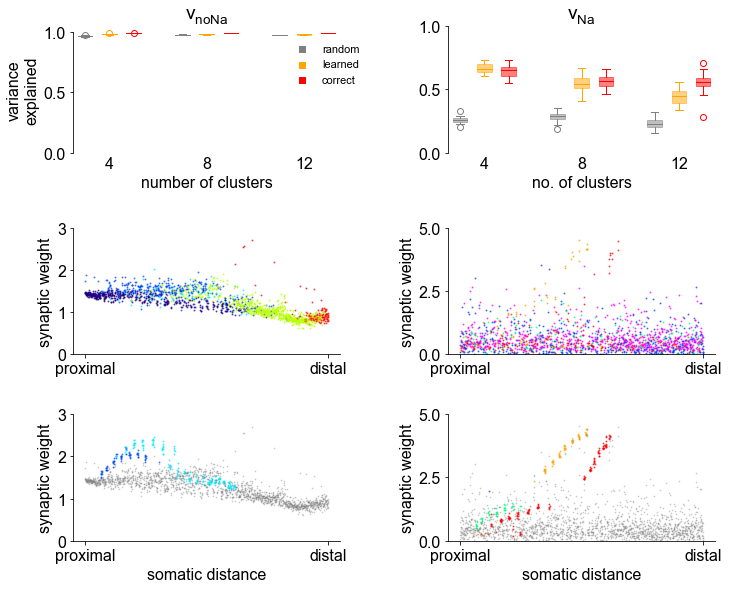

In [4]:
C4_dist_ord = np.argsort(C4_dist_raw[:2000])
clust_ord = [3,2,0,1]

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '16'

fig = plt.figure(constrained_layout=True, figsize = (10,13.5))
gs = fig.add_gridspec(6,2, wspace=0.1, hspace=0.2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

colors=["gray", "orange", "red"]
box_colors=["gray", "orange", "red",
           "gray", "orange", "red",
           "gray", "orange", "red"]

bp = ax1.boxplot(var_exp_nona[:,:], positions = [1,2,3,5,6,7,9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(9):
    if i%3 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="gray")
        plt.setp(bp["boxes"][i], color="gray")
        plt.setp(bp["medians"][i], color="gray")
    elif i%3 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="orange")
        plt.setp(bp["boxes"][i], color="orange")
        plt.setp(bp["medians"][i], color="orange")
    elif i%3 == 2:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(9*2):
    if (i%6 == 0) or (i%6 == 1):
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
    elif (i%6 == 2) or (i%6 == 3):
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
    elif (i%6 == 4) or (i%6 == 5):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis="x", length=0)
ax1.set_xticks([2,6,10])
ax1.set_xticklabels(["4", "8", "12"])
ax1.set_xlabel("number of clusters")
ax1.set_ylim(0,1.05)
ax1.spines.left.set_bounds((0, 1))
ax1.set_yticks([0,0.5,1])
ax1.set_title("$\mathregular{v_{noNa}}$")
ax1.set_ylabel("variance\nexplained")

hR = ax1.scatter(1,1,c='red', marker="s")
hG = ax1.scatter(1,1,c='gray', marker="s")
hN = ax1.scatter(1,1,c='orange', marker="s")

ax1.legend((hG, hN, hR),('random','learned','correct'), frameon=False,
          loc=(0.8,0.5), fontsize=11)
hR.set_visible(False)
hG.set_visible(False)
hN.set_visible(False)

"""
ins = ax1.inset_axes([0.15,0.15,0.8,0.5])
bp = ins.boxplot(var_exp_nona[:,:], positions = [1,2,3,5,6,7,9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(9):
    if i%3 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="gray")
        plt.setp(bp["boxes"][i], color="gray")
        plt.setp(bp["medians"][i], color="gray")
    elif i%3 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="orange")
        plt.setp(bp["boxes"][i], color="orange")
        plt.setp(bp["medians"][i], color="orange")
    elif i%3 == 2:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(9*2):
    if (i%6 == 0) or (i%6 == 1):
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
    elif (i%6 == 2) or (i%6 == 3):
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
    elif (i%6 == 4) or (i%6 == 5):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    
ins.spines['right'].set_visible(False)
ins.spines['top'].set_visible(False)
ins.spines['bottom'].set_visible(False)
ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_ylim(0.96,1.02)
ins.spines.left.set_bounds((0.96, 1))
ins.set_yticks([0.96,1])
"""
#########
##########

bp = ax2.boxplot(var_exp_diff[:,:], positions = [1,2,3,5,6,7,9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(9):
    if i%3 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="gray")
        plt.setp(bp["boxes"][i], color="gray")
        plt.setp(bp["medians"][i], color="gray")
    elif i%3 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="orange")
        plt.setp(bp["boxes"][i], color="orange")
        plt.setp(bp["medians"][i], color="orange")
    elif i%3 == 2:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(9*2):
    if (i%6 == 0) or (i%6 == 1):
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
    elif (i%6 == 2) or (i%6 == 3):
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
    elif (i%6 == 4) or (i%6 == 5):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticks([2,6,10])
ax2.set_xticklabels(["4", "8", "12"])
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(axis="x", length=0)
ax2.set_xlabel("no. of clusters")
ax2.set_ylim(0,1)
ax2.set_yticks([0,0.5,1])
ax2.set_title("$\mathregular{v_{Na}}$")
    
############
###########
color4_na = ["#ff0000", "#ff00ff", "#00ff80", "#0040ff", "#ffa200"]
color4_nona = ["#004cff", "#bbff00", "#ff0000", "#00eaff", "#1e0082"]

for i in tnrange(2000):
    plot_idx = C4_dist_ord[i]
    if (plot_idx < 880) or (plot_idx >= 1120):
    
        C4_diff_color = color4_na[C4_diff_idx[C4_dist_ord[i]]]
        C4_nona_color = color4_nona[C4_nona_idx[C4_dist_ord[i]]]

        ax4.scatter(i, C4_diff_scale[C4_dist_ord][i], s=1, color=C4_diff_color, alpha=0.6)
        ax3.scatter(i, C4_nona_scale[C4_dist_ord][i], s=1, color=C4_nona_color, alpha=0.6)
        
        ax6.scatter(i, C4_diff_scale[C4_dist_ord][i], s=0.5, color="gray", alpha=0.35)
        ax5.scatter(i, C4_nona_scale[C4_dist_ord][i], s=0.5, color="gray", alpha=0.35)
        
    elif (plot_idx >= 880) and (plot_idx < 1120):
        
        C4_diff_color = color4_na[C4_diff_idx[C4_dist_ord[i]]]
        C4_nona_color = color4_nona[C4_nona_idx[C4_dist_ord[i]]]

        ax6.scatter(i, C4_diff_scale[C4_dist_ord][i], s=1, color=C4_diff_color, alpha=0.6)
        ax5.scatter(i, C4_nona_scale[C4_dist_ord][i], s=1, color=C4_nona_color, alpha=0.6)
        
#for i in range(4):
    #clust_shift = clust_ord[i]
    #for j in range(5):
        #C4_diff_part_idx = np.where(C4_diff_idx[880+i*60:880+(i+1)*60] == j)[0]
        #C4_nona_part_idx = np.where(C4_nona_idx[880+i*60:880+(i+1)*60] == j)[0]
        #ax6.scatter(C4_diff_part_idx+60*clust_shift, C4_diff_scale[880+i*60:880+(i+1)*60][C4_diff_part_idx],
                    #s=1, color=color4[j])
        #ax5.scatter(C4_nona_part_idx+60*clust_shift, C4_nona_scale[880+i*60:880+(i+1)*60][C4_nona_part_idx],
                    #s=1, color=color4[j])
    
ax3.set_ylim(0,3)
ax5.set_ylim(0,3)
ax4.set_ylim(0,5)
ax6.set_ylim(0,5)
ax4.set_yticks([0,2.5,5])
ax6.set_yticks([0,2.5,5])

ax_list = [ax3, ax4, ax5, ax6]

for i in ax_list:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
        
ax3.set_ylabel("synaptic weight")
ax5.set_ylabel("synaptic weight")
ax4.set_ylabel("synaptic weight")
ax6.set_ylabel("synaptic weight")
#ax3.set_xlabel("somatic distance")
ax5.set_xlabel("somatic distance")
#ax4.set_xlabel("somatic distance")
ax6.set_xlabel("somatic distance")
#ax3.set_title("$\mathregular{v_{noNa}}$")
#ax4.set_title("$\mathregular{v_{Na}}$")


#ax3.set_xlabel("synapse ID")
#ax4.set_xlabel("synapse ID")
#ax5.set_xlabel("synapse ID")
#ax6.set_xlabel("synapse ID")

ax3.set_xticks([0,2000])
ax4.set_xticks([0,2000])
ax3.set_xticklabels(["proximal", "distal"])
ax4.set_xticklabels(["proximal", "distal"])

#for i in range(3):  
    #ax5.vlines(x=(i+1)*60, ymin=0, ymax=np.max(C4_nona_idx[880:1120]), linewidth=1, linestyle="--", color="gray")
    #ax6.vlines(x=(i+1)*60, ymin=0, ymax=np.max(C4_diff_idx[880:1120]), linewidth=1, linestyle="--", color="gray")
#ax5.set_xticks([0,240])
#ax6.set_xticks([0,240])
ax5.set_xticks([0,2000])
ax6.set_xticks([0,2000])
ax5.set_xticklabels(["proximal", "distal"])
ax6.set_xticklabels(["proximal", "distal"])

fig.tight_layout
#plt.show()
fig.savefig("/home/sklee/dendrite/fig8/fig8_raw.pdf", bbox_inches="tight", transparent=True)
